<a href="https://colab.research.google.com/github/yyaaoonngg/DL/blob/main/1_dr14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 파일 불러오기
FILE_PATH = '/content/drive/MyDrive/DL/Data/dr14q_spec_prop_ext.fits'
dr14 = fits.open(FILE_PATH)

In [ ]:
DATA = dr14[1].data

In [ ]:
DATA

In [ ]:
# 데이터에서 필요한 정보만 추출
SDSS_ID = DATA.field('SDSS_ID')
RA = DATA.field('RA')
DEC = DATA.field('DEC')
MASS = DATA.field('LOG_MBH') # virial SMBH mass estimate (log)
ERR = DATA.field('LOG_MBH_ERR') # err for mass (log)
Z = DATA.field('REDSHIFT') # AGN redshift
MI = DATA.field('MI') # K-corrected i-band magnitude

In [ ]:
# 데이터 프레임 만들기
df = pd.DataFrame(SDSS_ID, columns = ['SDSS_ID'])
df['ID'] = SDSS_ID
df['ra'] = RA
df['dec'] = DEC
df['Mass'] = MASS
df['z'] = Z
df['ERR'] = ERR
df['M_i'] = MI
df.apply(pd.to_numeric, errors = 'ignore')
df.shape

(526265, 8)

In [ ]:
print(df['Mass'].describe()[0])

526265.0


이 블랙홀 질량들 중에, 몇개는 에러가 엄청 크거나 질량이 잘못 들어감. 그레서 에러 질량 큰 거 제거해줄거임

In [ ]:
# NaN값이나 unphysocal estimates 제거
df = df.dropna() # 결측값(NA값) 제거해주는 method
df = df.drop(df[df.Mass<=0].index) # 질량값이 0보다 작은 거 잘라주기

In [ ]:
clean_df = df[df['ERR']<.3] # 에러가 너무 큰 녀석들 제거
clean_df.shape

(417618, 8)

거의 100k AGN이 삭제된 것을 볼 수 있당 <br>
이제 우리 데이터를 시각화해보자 <br>
다음은 하늘에서 관측된 AGN의 위치를 보여줌

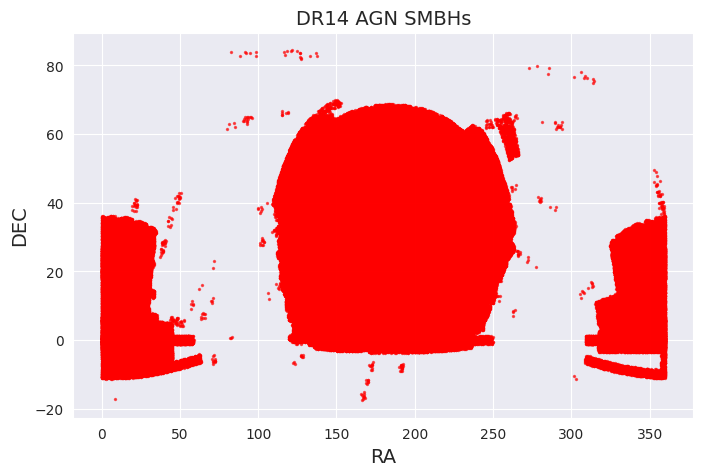

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize = [8,5])
plt.title('DR14 AGN SMBHs', fontsize = 14)
plt.xlabel('RA',fontsize = 14)
plt.ylabel('DEC',fontsize = 14)
plt.scatter(clean_df['ra'], clean_df['dec'], color = 'red', s = 2, alpha = .6)


다음은 우리 질량과 에러가 어떻게 분포하는지 알아볼게

<ipython-input-11-ea04a3973365>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(clean_df['Mass'], kde = False, color = 'blue')


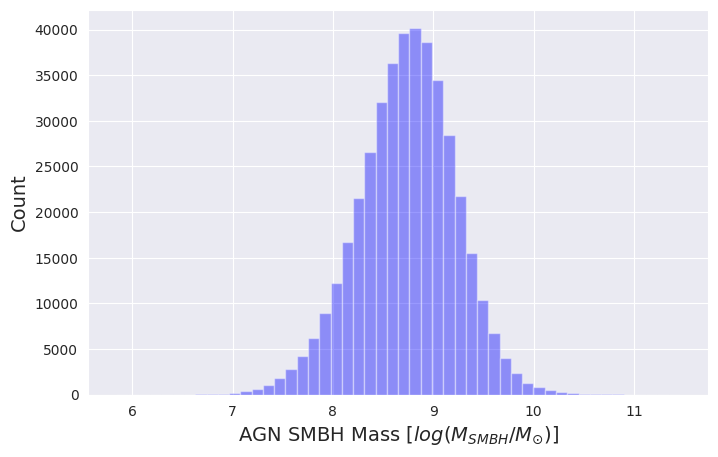

In [ ]:
plt.figure(figsize = (8,5))
sns.distplot(clean_df['Mass'], kde = False, color = 'blue')
plt.xlabel('AGN SMBH Mass [$log(M_{SMBH}/M_{\odot})$]',  fontsize=14)
plt.ylabel('Count',  fontsize=14)
plt.savefig('/content/drive/MyDrive/DL/mass_hist.pdf', bbox_inches = 'tight', pad_inches = 0)

<ipython-input-12-9bb6935390f6>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['z'], kde=False, color='red') # 왜 얘는 전체로 보는가


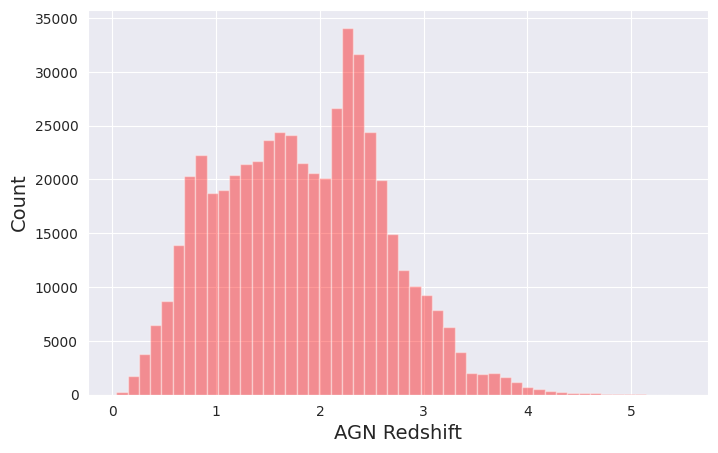

In [ ]:
# redshift distribution
plt.figure(figsize = (8,5))
sns.distplot(df['z'], kde=False, color='red') # 왜 얘는 전체로 보는가
plt.xlabel('AGN Redshift',  fontsize=14)
plt.ylabel('Count',  fontsize=14)
plt.savefig('/content/drive/MyDrive/DL/z_hist.pdf', bbox_inches = 'tight', pad_inches = 0)

<ipython-input-13-4f8be548e0cb>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(clean_df['ERR'], kde=False, color='red')


Text(0, 0.5, 'Count')

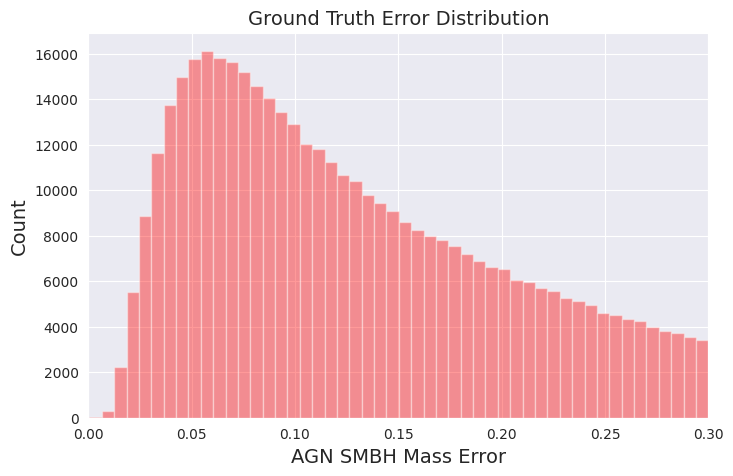

In [ ]:
plt.figure(figsize=(8, 5))
sns.distplot(clean_df['ERR'], kde=False, color='red')
plt.title('Ground Truth Error Distribution',  fontsize=14)
plt.xlim(0,.3)
plt.xlabel('AGN SMBH Mass Error',  fontsize=14)
plt.ylabel('Count',  fontsize=14)

Text(0.5, 1.0, 'DR14 AGN')

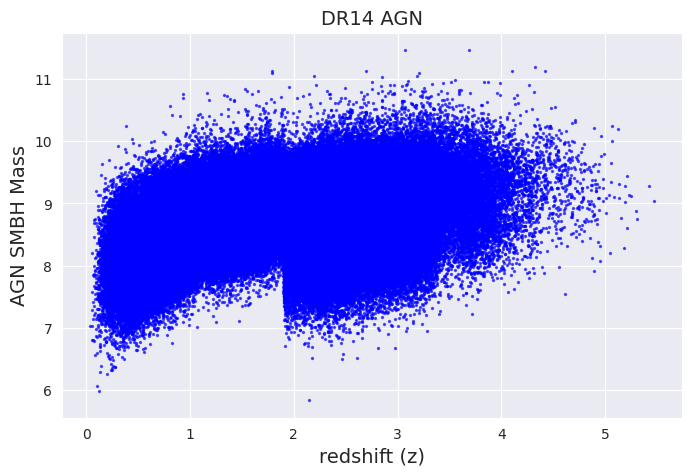

In [ ]:
# z에 따른 mass distribution
plt.figure(figsize = (8, 5))
plt.scatter(clean_df['z'], clean_df['Mass'], s = 2, c = 'b', alpha=.6)
plt.xlabel('redshift (z)', fontsize= 14)
plt.ylabel('AGN SMBH Mass', fontsize=14)
plt.title('DR14 AGN', fontsize=14)

In [ ]:
# output csv
clean_df.to_csv('/content/drive/MyDrive/DL/dr14_BH.csv')

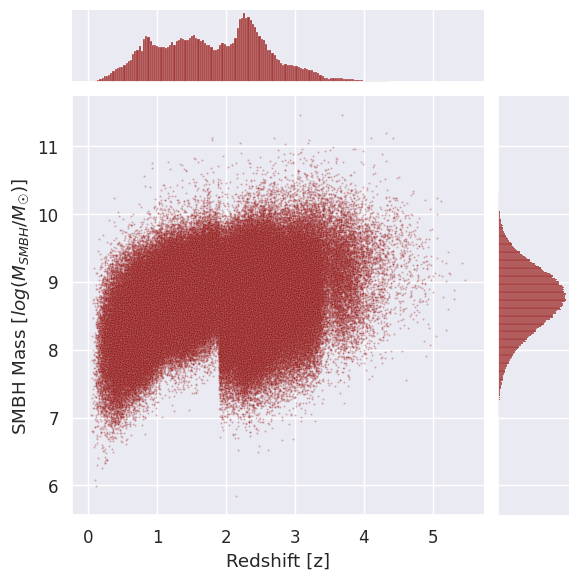

In [ ]:
sns.set(font_scale=1.1)
fig = sns.jointplot(data = clean_df, x = 'z', y = 'Mass',s=2,alpha=.3, color='darkred')
fig.set_axis_labels('Redshift [z]', "SMBH Mass [$log(M_{SMBH}/M_{☉})]$")
fig.savefig('/content/drive/MyDrive/DL/cleandfplot.png', dpi=300)

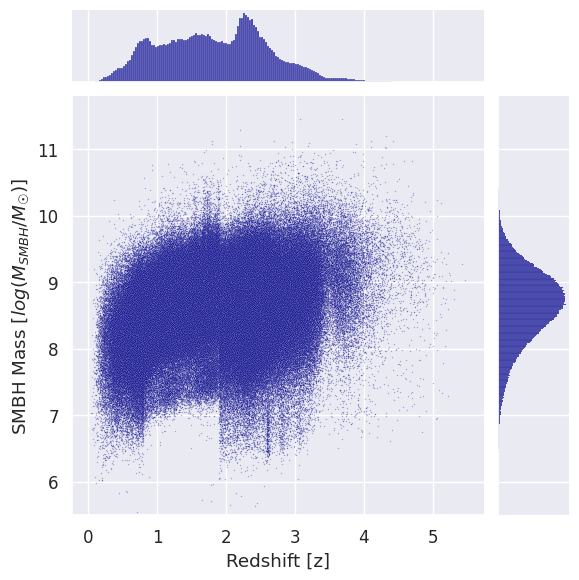

In [ ]:
sns.set(font_scale=1.1)
fig = sns.jointplot(data = df, x = 'z', y = 'Mass',s=1,alpha=.3, color='darkblue')
fig.set_axis_labels('Redshift [z]', "SMBH Mass [$log(M_{SMBH}/M_{☉})]$")
fig.ax_marg_y.set_ylim(5.5, 11.8)
fig.savefig('/content/drive/MyDrive/DL/dfplot.png', dpi=300)